In [1]:
import requests
page = requests.get("https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p1.html")
page

<Response [200]>

In [2]:
from bs4 import BeautifulSoup as bs

soup = bs(page.content, 'html.parser')

#branch = soup.find_all(class_='ProductList-content')
#branch = soup.select("div.ProductList-content li")
#item = branch[0].find('li')
#js = item.find('script')


In [3]:
product = soup.find('article', class_='ProductDisplay')

ProductName = product.find('div', class_='ProductDisplay-name')
product_name_a = ProductName.find('a')

print(product_name_a['title'])
print("https://wine.com.br" + product_name_a['href'])

country = product.find(class_="Country")
print(country.span.text)

wine_type = product.find(class_="ProductDisplay-type")
print(wine_type.span.text)

wine_description = product.find(class_="ProductDisplay-descriptionText")
print(wine_description.text)
      
# print(product_name_a.prettify())

Pérez Cruz Limited Edition D.O. Valle del Maipo Cabernet Franc 2016
https://wine.com.br/vinhos/perez-cruz-limited-edition-d-o-valle-del-maipo-cabernet-franc-2016/prod20081.html
Chile
tinto
Frutado, taninos presentes, médio corpo, fresco, amadeirado, especiarias


In [80]:
# Buscando Notas e numero de avaliações
import re

wine_rating = product.find('div',class_='Rating')
wine_evaluation_tag = wine_rating.find('evaluation-tag')
if (wine_evaluation_tag):
    wine_evaluation = re.compile(r"\d.\d").search(wine_evaluation_tag.prettify()).group()
    wine_rating_count = re.search(r"\d+", wine_rating.find(class_='Rating-count').text).group()
else:
    wine_evaluation = None
    wine_rating_count = 0

print(str(wine_rating))
print(wine_evaluation)
print(wine_rating_count)

<div class="Rating">
<div class="Rating-stars">
<div class="vue-evaluation-tag">
<evaluation-tag :evaluation="4.0"></evaluation-tag>
</div>
</div>
<a class="Rating-count" href="/vinhos/perez-cruz-limited-edition-d-o-valle-del-maipo-cabernet-franc-2016/prod20081.html#Comments">(7)</a>
</div>
4.0
7


In [83]:
price_box = product.find(class_="ProductDisplay-priceBox")

lowest_price = price_box.find(class_="Price--lowestPrice").find(class_="Price-raw").text
full_price = price_box.find(class_="Price--fullPrice").find(class_="Price-raw").text
print(lowest_price)
print(full_price)

discount = 1-float(lowest_price)/float(full_price)
print(discount)

145.76
180.90
0.1942509673852958


In [89]:
pages_list = soup.find('div', class_='Pagination').ul.find_all('li')
int(pages_list[len(pages_list)-1].a.text)

44

In [82]:
wine_list = soup.find('div', class_='ProductList-content').ul.find_all('li')

for wine_item in wine_list:
    wine = wine_item.find('article', class_='ProductDisplay')

    wine_name = wine.find('div', class_='ProductDisplay-name').a['title']
    wine_link = "https://wine.com.br" + wine.find('div', class_='ProductDisplay-name').a['href']
    wine_country = wine.find(class_="Country").span.text
    wine_type = wine.find(class_="ProductDisplay-type").span.text
    wine_description = wine.find(class_="ProductDisplay-descriptionText").text
    
    wine_rating = wine.find('div',class_='Rating')
    wine_evaluation_tag = wine_rating.find('evaluation-tag')
    if (wine_evaluation_tag):
        wine_evaluation = re.compile(r"\d.\d").search(wine_evaluation_tag.prettify()).group()
        wine_rating_count = re.search(r"\d+", wine_rating.find(class_='Rating-count').text).group()
    else:
        wine_evaluation = None
        wine_rating_count = 0
    
    price_box = wine.find(class_="ProductDisplay-priceBox")

    lowest_price = price_box.find(class_="Price--lowestPrice").find(class_="Price-raw").text
    full_price = price_box.find(class_="Price--fullPrice").find(class_="Price-raw").text
    discount = 1-float(lowest_price)/float(full_price)
    
    
    print(wine_name,";", wine_evaluation, ";", wine_rating_count, ";", wine_country, ";", wine_type, ";", lowest_price, ";", full_price, ";", discount,";", wine_description, ";", wine_link)

Pérez Cruz Limited Edition D.O. Valle del Maipo Cabernet Franc 2016 ; 4.0 ; 7 ; Chile ; tinto ; 145.76 ; 180.90 ; 0.1942509673852958 ; Frutado, taninos presentes, médio corpo, fresco, amadeirado, especiarias ; https://wine.com.br/vinhos/perez-cruz-limited-edition-d-o-valle-del-maipo-cabernet-franc-2016/prod20081.html
Finca La Chamiza Martín Alsina Malbec 2014 ; None ; 0 ; Argentina ; tinto ; 292.82 ; 495.90 ; 0.4095180479935471 ; Frutado, amadeirado, corpo de médio para encorpado, taninos presentes, acidez agradável ; https://wine.com.br/vinhos/finca-la-chamiza-martin-alsina-malbec-2014/prod20028.html
Domaine L'Ostal Cazes Grand Vin 2015 ; None ; 0 ; França ; tinto ; 258.71 ; 335.90 ; 0.22980053587377192 ; Encorpado, boa acidez, taninos macios ; https://wine.com.br/vinhos/domaine-l-ostal-cazes-grand-vin-2015/prod20143.html
Maycas del Limarí Reserva Especial Pinot Noir 2017 ; 4.5 ; 23 ; Chile ; tinto ; 166.94 ; 206.90 ; 0.19313678105364918 ; Bom corpo, acidez presente, taninos sedosos, 

In [4]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import re
import time

URL_RAIZ="https://www.wine.com.br"
URL_BASE = URL_RAIZ+"/vinhos/tinto/cVINHOS-atTIPO_TINTO-p{0}.html"


HEADERS = {
    'user-agent': ('Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 '
                   '(KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36')
}



In [23]:
def get_num_pages(soup):
    
    pages_list = soup.find('div', class_='Pagination').ul.find_all('li')
    num_pages = int(pages_list[len(pages_list)-1].a.text) + 1
    
    return num_pages

def scrape_soup(soup):
    
    list_name=[]
    list_link, list_country, list_type, list_description= [], [], [], []
    list_evaluation, list_rating_count= [], []
    list_lowest_price, list_full_price, list_discount= [], [], []
    
    wine_list = soup.find('div', class_='ProductList-content').ul.find_all('li')

    for wine_item in wine_list:
        
        try:
            wine = wine_item.find('article', class_='ProductDisplay')

            wine_name = wine.find('div', class_='ProductDisplay-name').a['title']
            wine_link = "wine.com.br" + wine.find('div', class_='ProductDisplay-name').a['href']
            wine_country = wine.find(class_="Country").span.text
            wine_type = wine.find(class_="ProductDisplay-type").span.text
            wine_description = wine.find(class_="ProductDisplay-descriptionText").text
        
            wine_rating = wine.find('div',class_='Rating')
            wine_evaluation_tag = wine_rating.find('evaluation-tag')
            if (wine_evaluation_tag):
                wine_evaluation = float(re.compile(r"\d.\d").search(wine_evaluation_tag.prettify()).group())
                wine_rating_count = float(re.search(r"\d+", wine_rating.find(class_='Rating-count').text).group())
            else:
                wine_evaluation = 0
                wine_rating_count = 0
    
        
            price_box = wine.find(class_="ProductDisplay-priceBox")

            lowest_price = float(price_box.find(class_="Price--lowestPrice").find(class_="Price-raw").text)
            full_price = float(price_box.find(class_="Price--fullPrice").find(class_="Price-raw").text)
            discount = 1-float(lowest_price)/float(full_price)
        except:
            if wine_name:
                print('skip incomplete item:', wine_name)
                continue
            else:
                print("skip incomplete item: no name")
                continue
        
        list_name.append(wine_name)
        list_link.append(wine_link)
        list_country.append(wine_country)
        list_type.append(wine_type)
        list_description.append(wine_description)
        
        list_evaluation.append(wine_evaluation)
        list_rating_count.append(wine_rating_count)

        list_lowest_price.append(lowest_price)
        list_full_price.append(full_price)
        list_discount.append(discount)
        
        ###print(wine_name,";", wine_evaluation, ";", wine_rating_count, ";", wine_country, ";", wine_type, ";", lowest_price, ";", full_price, ";", discount,";", wine_link)
    
    df = pd.DataFrame({
        'wine_name': list_name,
        'link': list_link,
        'country': list_country,
        'type': list_type,
        'description': list_description,
        'evaluation': list_evaluation,
        'rating_count': list_rating_count,
        'lowest_price': list_lowest_price,
        'full_price': list_full_price,
        'discount': list_discount
    })
    
    return df
        
    

def get_soup(page_url, retry_count=0):
    
    session= requests.Session()
    
    try:
        response = session.get(page_url, headers=HEADERS)
    except:
        retry_count += 1
        if retry_count <= 3:
            session = requests.Session()
            get_soup(page_url, retry_count)
        else:
            raise
            
    print("\nScraping page:",page_url," = ", response)
    
    soup = bs(response.content, 'html.parser')
    
    return soup
    


In [24]:
pages_to_scrape = 4

current_page = 1

wine_df = pd.DataFrame(columns=['wine_name','link','country','type','description','evaluation','rating_count','lowest_price','full_price','discount'])

while (current_page != pages_to_scrape):
    
    wine_soup = get_soup(URL_BASE.format(current_page))
    
    if current_page == 1:
        pages_to_scrape = get_num_pages(wine_soup)
    
    new_df = scrape_soup(wine_soup)
    wine_df= wine_df.append(new_df, ignore_index=True)
    
    ###print(current_page)
    
    time.sleep(10)
    current_page += 1
    
print("Scrape finished.")
wine_df




Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p1.html  =  <Response [200]>

Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p2.html  =  <Response [200]>

Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p3.html  =  <Response [200]>

Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p4.html  =  <Response [200]>

Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p5.html  =  <Response [200]>

Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p6.html  =  <Response [200]>

Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p7.html  =  <Response [200]>

Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p8.html  =  <Response [200]>
skip incomplete item: WineBox Pinhal da Torre

Scraping page: https://www.wine.com.br/vinhos/tinto/cVINHOS-atTIPO_TINTO-p9.html  =  <Response [200]>

Scraping page: https://www

,wine_name,link,country,type,description,evaluation,rating_count,lowest_price,full_price,discount
0,Pérez Cruz Limited Edition D.O. Valle del Maip...,wine.com.br/vinhos/perez-cruz-limited-edition-...,Chile,tinto,"Frutado, taninos presentes, médio corpo, fresc...",4.0,7.0,145.76,180.90,0.194251
1,Finca La Chamiza Martín Alsina Malbec 2014,wine.com.br/vinhos/finca-la-chamiza-martin-als...,Argentina,tinto,"Frutado, amadeirado, corpo de médio para encor...",0.0,0.0,292.82,495.90,0.409518
2,Domaine L'Ostal Cazes Grand Vin 2015,wine.com.br/vinhos/domaine-l-ostal-cazes-grand...,França,tinto,"Encorpado, boa acidez, taninos macios",0.0,0.0,258.71,335.90,0.229801
3,Maycas del Limarí Reserva Especial Pinot Noir ...,wine.com.br/vinhos/maycas-del-limari-reserva-e...,Chile,tinto,"Bom corpo, acidez presente, taninos sedosos, f...",4.5,23.0,166.94,206.90,0.193137
4,Pauillac De Lynch-Bages 2015,wine.com.br/vinhos/pauillac-de-lynch-bages-201...,França,tinto,"Médio corpo, boa acidez, taninos presentes, fi...",3.0,1.0,364.59,630.90,0.422111
5,Château Puy-Blanquet A.O.C. Saint-Émilion Gran...,wine.com.br/vinhos/chateau-puy-blanquet-a-o-c-...,França,tinto,"Elegante, acidez agradável, bom corpo, taninos...",3.5,2.0,359.88,445.90,0.192913
6,Jean-Pierre Moueix A.O.C. Pomerol 2015,wine.com.br/vinhos/jean-pierre-moueix-a-o-c-po...,França,tinto,"Médio corpo, taninos macios, acidez agradável,...",0.0,0.0,339.88,414.90,0.180815
7,Echo de Lynch-Bages A.O.C. Pauillac 2014,wine.com.br/vinhos/echo-de-lynch-bages-a-o-c-p...,França,tinto,"Exuberante, encorpado, taninos presentes, boa ...",0.0,0.0,721.06,1056.90,0.317759
8,Château La Fleur-Pétrus A.O.C. Pomerol 2006,wine.com.br/vinhos/chateau-la-fleur-petrus-a-o...,França,tinto,"Aveludado, complexo, boa acidez, corpo de médi...",0.0,0.0,3614.00,6036.90,0.401348
9,Viña Vilano Roble Tempranillo 2016,wine.com.br/vinhos/vina-vilano-roble-tempranil...,Espanha,tinto,"Encorpado, taninos presentes, boa acidez, harm...",2.5,10.0,84.59,167.90,0.496188


In [25]:
wine_df.loc[wine_df['rating_count']>=100]
wine_df.loc[189,'link']


'wine.com.br/vinhos/cafe-du-midi-igp-pays-doc-merlot-2019/prod24018.html'

In [26]:
wine_deals = wine_df.loc[(wine_df.rating_count>=36) & (wine_df.evaluation >= 4.2) & (wine_df.lowest_price < 66.20)]
wine_deals

,wine_name,link,country,type,description,evaluation,rating_count,lowest_price,full_price,discount
233,Root: 1 Reserva Heritage Red 2018,wine.com.br/vinhos/root-1-reserva-heritage-red...,Chile,tinto,"Médio corpo, taninos macios, acidez agradável",4.5,91.0,56.35,69.90,0.193848
262,Esteban Martín Reserva D.O.P. Cariñena 2014,wine.com.br/vinhos/esteban-martin-reserva-d-o-...,Espanha,tinto,"Médio corpo, taninos macios, boa acidez, final...",4.5,95.0,65.76,88.90,0.260292
266,Esteban Martín D.O.P. Cariñena Crianza 2015,wine.com.br/vinhos/esteban-martin-d-o-p-carine...,Espanha,tinto,"Médio corpo, acidez agradável, taninos firmes",4.5,65.0,55.18,73.90,0.253315
273,Gérard Bertrand Narbo Martius Réserve Blend 2018,wine.com.br/vinhos/gerard-bertrand-narbo-marti...,França,tinto,"Elegante, taninos aveludados e final agradável",4.5,412.0,54.67,54.67,0.000000
274,Gérard Bertrand Narbo Martius Cabernet Sauvign...,wine.com.br/vinhos/gerard-bertrand-narbo-marti...,França,tinto,"Encorpado, taninos finos, final longo",4.5,427.0,64.90,64.90,0.000000
312,Toro Loco D.O.P. Utiel-Requena Tinto Superior ...,wine.com.br/vinhos/toro-loco-d-o-p-utiel-reque...,Espanha,tinto,"Frutado, corpo de leve para médio, taninos mac...",4.5,497.0,41.06,52.90,0.223819
356,V9 Reserva Cabernet Sauvignon 2018,wine.com.br/vinhos/v9-reserva-cabernet-sauvign...,Chile,tinto,"Frutado, bom corpo, taninos presentes, fresco",4.5,63.0,50.47,62.90,0.197615


In [27]:
wine_exotic = wine_df.loc[~wine_df.country.isin(['Chile','França','Espanha','Argentina','Itália','Portugal','Brasil','Estados Unidos','Uruguai'])]
wine_exotic.loc[wine_exotic.country == 'China']

#wine_exotic.iloc[2].link

,wine_name,link,country,type,description,evaluation,rating_count,lowest_price,full_price,discount
202,Chateau Moser XV Cabernet Sauvignon 2017,wine.com.br/vinhos/chateau-moser-xv-cabernet-s...,China,tinto,"Saboroso, encorpado, boa acidez",3.5,23.0,46.94,85.9,0.453551
248,Changyu Reserve Noble Dragon Red 2016,wine.com.br/vinhos/changyu-reserve-noble-drago...,China,tinto,"Encorpado, frutado, taninos firmes.",3.5,81.0,55.18,76.9,0.282445


In [28]:
wine_df.lowest_price.describe()

count      369.000000
mean       481.507940
std       1537.340307
min         36.350000
25%         66.170000
50%        105.760000
75%        204.900000
max      14598.710000
Name: lowest_price, dtype: float64

In [29]:
wine_df.loc[wine_df.evaluation > 0].describe()

,evaluation,rating_count,lowest_price,full_price,discount
count,288.000000,288.000000,288.000000,288.000000,288.000000
mean,4.031250,45.211806,211.786806,304.847326,0.227496
std,0.598252,114.501557,746.062522,1183.396639,0.145827
min,1.000000,1.000000,36.350000,43.900000,0.000000
25%,4.000000,5.000000,62.240000,83.900000,0.158472
50%,4.000000,16.000000,89.880000,119.120000,0.229224
75%,4.500000,44.500000,147.235000,189.900000,0.323129
max,5.000000,1358.000000,9303.410000,14794.900000,0.879230


In [30]:
print(wine_df.country.describe())
print(wine_df.rating_count.mean())
print(wine_df.country.unique())

count        369
unique        15
top       França
freq          78
Name: country, dtype: object
35.28726287262872
['Chile' 'Argentina' 'França' 'Espanha' 'Estados Unidos' 'Itália'
 'Portugal' 'Brasil' 'Uruguai' 'Áustria' 'Líbano' 'África do Sul' 'China'
 'Austrália' 'Alemanha']


In [31]:
wine_df.groupby('country').lowest_price.min()

country
Alemanha          119.90
Argentina          36.35
Austrália         120.90
Brasil             57.53
Chile              37.53
China              46.94
Espanha            39.88
Estados Unidos     52.82
França             39.88
Itália             39.88
Líbano            125.76
Portugal           37.53
Uruguai            38.71
África do Sul      45.76
Áustria           126.94
Name: lowest_price, dtype: float64

In [32]:
wine_deals.groupby('country').lowest_price.min()

country
Chile      50.47
Espanha    41.06
França     54.67
Name: lowest_price, dtype: float64

In [33]:
wine_df.groupby(['country','type']).apply(lambda df: df.loc[df.rating_count.idxmax()])

,,wine_name,link,country,type,description,evaluation,rating_count,lowest_price,full_price,discount
country,type,,,,,,,,,,
Alemanha,tinto,Ernst Loosen Winemakers Select Pfalz Edition P...,wine.com.br/vinhos/ernst-loosen-winemakers-sel...,Alemanha,tinto,"Leve, acidez presente, taninos sedosos",4.0,18.0,119.90,119.90,0.000000
Argentina,tinto,Clos de Los Siete By Michel Rolland 2016,wine.com.br/vinhos/clos-de-los-siete-by-michel...,Argentina,tinto,"Encorpado, taninos presentes, boa acidez, boa ...",4.5,326.0,130.47,179.90,0.274764
Austrália,tinto,Oxford Landing Cabernet Shiraz 2016,wine.com.br/vinhos/oxford-landing-cabernet-shi...,Austrália,tinto,"Corpo de leve para médio, boa acidez, taninos ...",3.5,6.0,120.90,120.90,0.000000
Brasil,tinto,Salton Desejo 2015,wine.com.br/vinhos/salton-desejo-2015/prod2220...,Brasil,tinto,"Corpo de médio para encorpado, taninos present...",4.5,9.0,114.00,139.90,0.185132
Chile,tinto,Undurraga Talagante Reserva Pinot Noir 2018,wine.com.br/vinhos/undurraga-talagante-reserva...,Chile,tinto,"Fresco, jovem, corpo médio e com bela acidez",4.0,491.0,58.90,58.90,0.000000
China,tinto,Changyu Reserve Noble Dragon Red 2016,wine.com.br/vinhos/changyu-reserve-noble-drago...,China,tinto,"Encorpado, frutado, taninos firmes.",3.5,81.0,55.18,76.90,0.282445
Espanha,tinto,Toro Loco D.O.P. Utiel-Requena Tinto Superior ...,wine.com.br/vinhos/toro-loco-d-o-p-utiel-reque...,Espanha,tinto,"Frutado, corpo de leve para médio, taninos mac...",4.5,497.0,41.06,52.90,0.223819
Estados Unidos,tinto,Bear Flag Red Blend 2018,wine.com.br/vinhos/bear-flag-red-blend-2018/pr...,Estados Unidos,tinto,"Encorpado, macio, saboroso e com final persist...",4.0,1358.0,62.24,76.90,0.190637
França,tinto,Café du Midi IGP Pays dOc Cabernet Sauvignon 2019,wine.com.br/vinhos/cafe-du-midi-igp-pays-doc-c...,França,tinto,"Bom corpo, boa acidez e final agradável",4.0,483.0,58.75,58.75,0.000000


In [34]:
sorted_wines = wine_deals.sort_values(by=['lowest_price','evaluation'])
sorted_wines

,wine_name,link,country,type,description,evaluation,rating_count,lowest_price,full_price,discount
312,Toro Loco D.O.P. Utiel-Requena Tinto Superior ...,wine.com.br/vinhos/toro-loco-d-o-p-utiel-reque...,Espanha,tinto,"Frutado, corpo de leve para médio, taninos mac...",4.5,497.0,41.06,52.90,0.223819
356,V9 Reserva Cabernet Sauvignon 2018,wine.com.br/vinhos/v9-reserva-cabernet-sauvign...,Chile,tinto,"Frutado, bom corpo, taninos presentes, fresco",4.5,63.0,50.47,62.90,0.197615
273,Gérard Bertrand Narbo Martius Réserve Blend 2018,wine.com.br/vinhos/gerard-bertrand-narbo-marti...,França,tinto,"Elegante, taninos aveludados e final agradável",4.5,412.0,54.67,54.67,0.000000
266,Esteban Martín D.O.P. Cariñena Crianza 2015,wine.com.br/vinhos/esteban-martin-d-o-p-carine...,Espanha,tinto,"Médio corpo, acidez agradável, taninos firmes",4.5,65.0,55.18,73.90,0.253315
233,Root: 1 Reserva Heritage Red 2018,wine.com.br/vinhos/root-1-reserva-heritage-red...,Chile,tinto,"Médio corpo, taninos macios, acidez agradável",4.5,91.0,56.35,69.90,0.193848
274,Gérard Bertrand Narbo Martius Cabernet Sauvign...,wine.com.br/vinhos/gerard-bertrand-narbo-marti...,França,tinto,"Encorpado, taninos finos, final longo",4.5,427.0,64.90,64.90,0.000000
262,Esteban Martín Reserva D.O.P. Cariñena 2014,wine.com.br/vinhos/esteban-martin-reserva-d-o-...,Espanha,tinto,"Médio corpo, taninos macios, boa acidez, final...",4.5,95.0,65.76,88.90,0.260292


In [35]:
for index, row in sorted_wines.iterrows():
    print(row.wine_name, "\t", row.link)



Toro Loco D.O.P. Utiel-Requena Tinto Superior 2018 	 wine.com.br/vinhos/toro-loco-d-o-p-utiel-requena-tinto-superior-2018/prod23299.html
V9 Reserva Cabernet Sauvignon 2018 	 wine.com.br/vinhos/v9-reserva-cabernet-sauvignon-2018/prod22182.html
Gérard Bertrand Narbo Martius Réserve Blend 2018 	 wine.com.br/vinhos/gerard-bertrand-narbo-martius-reserve-blend-2018/prod23409.html
Esteban Martín D.O.P. Cariñena Crianza 2015 	 wine.com.br/vinhos/esteban-martin-d-o-p-carinena-crianza-2015/prod20149.html
Root: 1 Reserva Heritage Red 2018 	 wine.com.br/vinhos/root-1-reserva-heritage-red-2018/prod22767.html
Gérard Bertrand Narbo Martius Cabernet Sauvignon 2018 	 wine.com.br/vinhos/gerard-bertrand-narbo-martius-cabernet-sauvignon-2018/prod23408.html
Esteban Martín Reserva D.O.P. Cariñena 2014 	 wine.com.br/vinhos/esteban-martin-reserva-d-o-p-carinena-2014/prod20150.html


Análise Descritiva - Wine


In [36]:
import matplotlib.pyplot as plt

#wine_df.boxplot(column=wine_df.groupby('country'))
wine_df.groupby('country')['lowest_price'].describe()


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Alemanha,1.0,119.900000,NaN,119.90,119.9000,119.900,119.9000,119.90
Argentina,35.0,108.318571,99.857622,36.35,49.8800,82.240,120.4700,565.76
Austrália,2.0,120.900000,0.000000,120.90,120.9000,120.900,120.9000,120.90
Brasil,11.0,117.377273,56.425515,57.53,83.9000,114.000,127.3300,268.12
Chile,66.0,130.966970,151.313287,37.53,58.7875,79.295,145.7600,941.06
China,2.0,51.060000,5.826560,46.94,49.0000,51.060,53.1200,55.18
Espanha,59.0,92.278983,49.928214,39.88,61.0600,78.710,106.9000,304.59
Estados Unidos,34.0,604.844706,1584.429705,52.82,118.3400,164.585,217.5300,8938.71
França,78.0,1571.916410,2921.609433,39.88,89.0025,281.650,1218.1175,14598.71


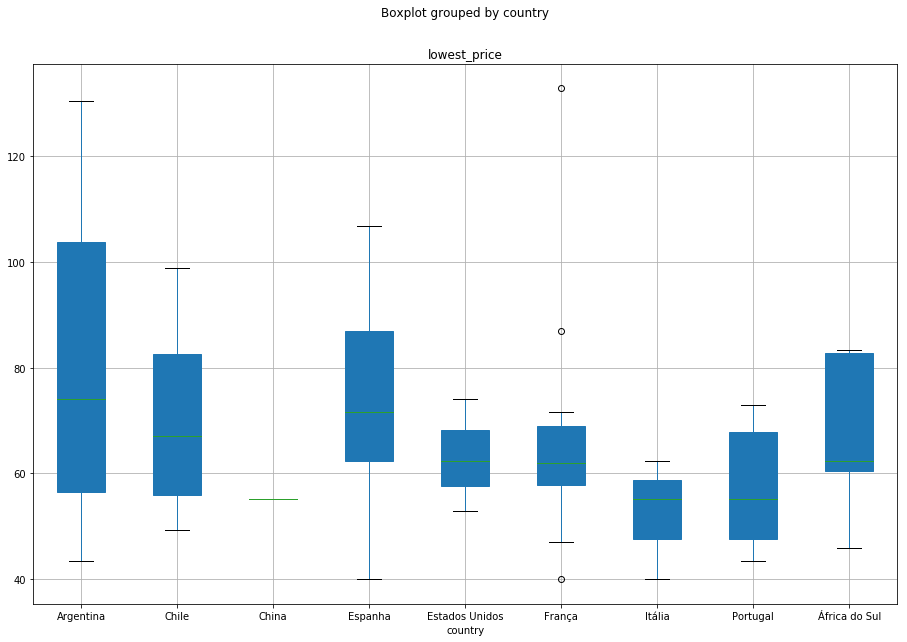

In [37]:
wine_df.loc[(wine_df.evaluation > 3.1) & (wine_df.lowest_price < 200.0) & (wine_df.rating_count > 34.0)].boxplot(by='country',column=['lowest_price'], figsize=(15,10), patch_artist=True)

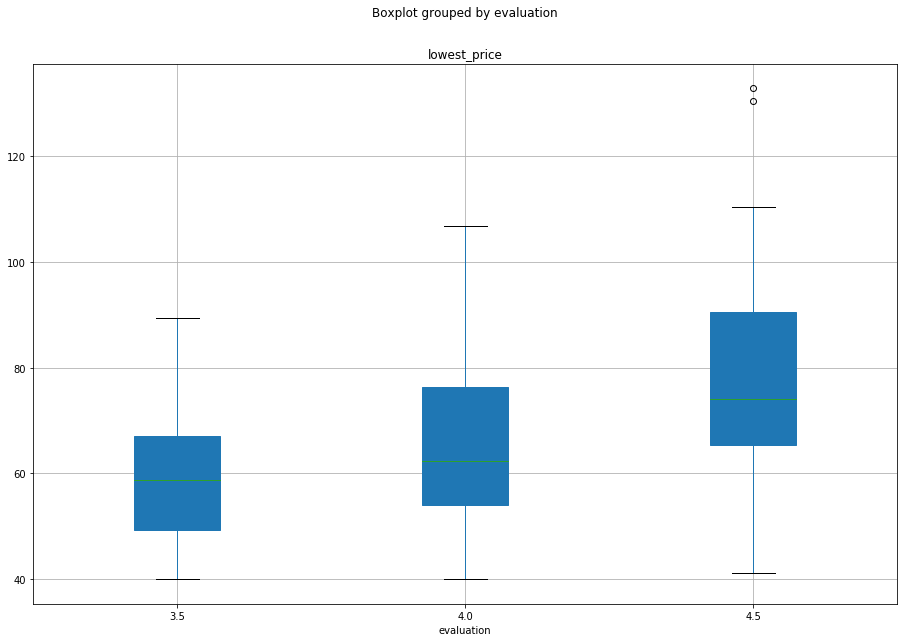

In [38]:
wine_plot = wine_df.loc[(wine_df.evaluation > 3.1) & (wine_df.lowest_price < 1000.0) & (wine_df.rating_count > 34.0)]
wine_plot.boxplot(by='evaluation',column=['lowest_price'], figsize=(15,10), patch_artist=True)

In [39]:
wine_df.evaluation.corr(wine_df.lowest_price)

-0.3021511600984333

URL Encoding para buscar no Vivino


In [45]:
import urllib.parse

wine_deals = wine_df.loc[(wine_df.rating_count>=36) & (wine_df.evaluation >= 4.2) & (wine_df.lowest_price < 66.20)]
sorted_wines = wine_deals.sort_values(by=['lowest_price','evaluation'])

for index, row in sorted_wines.iterrows():
    query_url = urllib.parse.quote(row.wine_name)
    print(query_url.replace("%20","+"), "\t", 'https://'+row.link)

Toro+Loco+D.O.P.+Utiel-Requena+Tinto+Superior+2018 	 https://wine.com.br/vinhos/toro-loco-d-o-p-utiel-requena-tinto-superior-2018/prod23299.html
V9+Reserva+Cabernet+Sauvignon+2018 	 https://wine.com.br/vinhos/v9-reserva-cabernet-sauvignon-2018/prod22182.html
G%C3%A9rard+Bertrand+Narbo+Martius+R%C3%A9serve+Blend+2018 	 https://wine.com.br/vinhos/gerard-bertrand-narbo-martius-reserve-blend-2018/prod23409.html
Esteban+Mart%C3%ADn+D.O.P.+Cari%C3%B1ena+Crianza+2015 	 https://wine.com.br/vinhos/esteban-martin-d-o-p-carinena-crianza-2015/prod20149.html
Root%3A+1+Reserva+Heritage+Red+2018 	 https://wine.com.br/vinhos/root-1-reserva-heritage-red-2018/prod22767.html
G%C3%A9rard+Bertrand+Narbo+Martius+Cabernet+Sauvignon+2018 	 https://wine.com.br/vinhos/gerard-bertrand-narbo-martius-cabernet-sauvignon-2018/prod23408.html
Esteban+Mart%C3%ADn+Reserva+D.O.P.+Cari%C3%B1ena+2014 	 https://wine.com.br/vinhos/esteban-martin-reserva-d-o-p-carinena-2014/prod20150.html


In [47]:
new_url = 'https://www.vivino.com/search/wines?q='+query_url.replace("%20","+")
new_url

'https://www.vivino.com/search/wines?q=Esteban+Mart%C3%ADn+Reserva+D.O.P.+Cari%C3%B1ena+2014'